Klanttevredenheid:
• Een bank probeert vroegtijdig ontevreden klanten op te sporen.
• Gegeven is een dataset "customersatisfaction.csv" met geanonimiseerde gegevens
van hun klanten en de bijhorende klantentevredenheid. De features zelf werden ook
geanonimiseerd. De target kolom is de variabele die voorspeld moet worden. 1 staat
voor ontevreden klanten, 0 staat voor tevreden klanten.

# Importeren van de modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Inlezen van data

In [2]:
df_raw = pd.read_csv('customersatisfaction.csv',delimiter=',')
df = df_raw.copy()
print(f'Het originele dataframe bevat {df.shape[0]} rijen en {df.shape[1]} kolommen')

Het originele dataframe bevat 76020 rijen en 371 kolommen


In [3]:
df.head().transpose() 

0         1         2         3              4
ID                           1.00      3.00      4.00      8.00      10.000000
var3                         2.00      2.00      2.00      2.00       2.000000
var15                       23.00     34.00     23.00     37.00      39.000000
imp_ent_var16_ult1           0.00      0.00      0.00      0.00       0.000000
imp_op_var39_comer_ult1      0.00      0.00      0.00    195.00       0.000000
...                           ...       ...       ...       ...            ...
saldo_medio_var44_hace3      0.00      0.00      0.00      0.00       0.000000
saldo_medio_var44_ult1       0.00      0.00      0.00      0.00       0.000000
saldo_medio_var44_ult3       0.00      0.00      0.00      0.00       0.000000
var38                    39205.17  49278.03  67333.77  64007.97  117310.979016
TARGET                       0.00      0.00      0.00      0.00       0.000000

[371 rows x 5 columns]

# Is de data gebalanceerd

In [4]:
print(df['TARGET'].value_counts()) 

0    73012
1     3008
Name: TARGET, dtype: int64


# Kijken of we kunnen vereenvoudigen

In [5]:
#welke types van waarde hebben we. 
df.dtypes.value_counts()

int64      260
float64    111
dtype: int64

In [6]:
df.select_dtypes(include=['int64']).nunique().sort_values()

num_var28_0              1
num_var2_0_ult1          1
num_var28                1
ind_var41                1
num_var27                1
                     ...  
num_op_var39_ult3       99
var15                  100
num_var45_ult3         172
var3                   208
ID                   76020
Length: 260, dtype: int64

In [7]:
#Alle kollomen die identieke waarden bevaten worden verwijderd.
features_to_drop = df.nunique()
features_to_drop = features_to_drop.loc[features_to_drop.values==1].index
df = df.drop(features_to_drop,axis=1)

In [8]:
print(f'Het gereduceerde dataframe bevat {df.shape[0]} rijen en {df.shape[1]} kolommen')

Het gereduceerde dataframe bevat 76020 rijen en 337 kolommen


# Toepassen van decisiontree

In [9]:
#afspiltsen van de te voorspellen waarde
X = df.drop('TARGET',axis=1)
y = df['TARGET']

In [10]:
#afzonderen van training en testdata. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state =0)

In [11]:
#Bouwen van het model
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
#toepassen van getrainde model op test data
base_pred = model.predict(X_test)

In [13]:
#confusion matrix
confusion_matrix(y_test,base_pred)

array([[9188,  384],
       [ 360,   68]], dtype=int64)

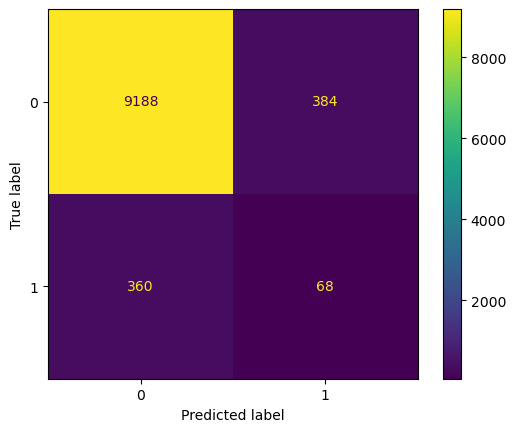

In [14]:
# Idem: confusion matrix, maar mooi geplot - Ruwe waarden
cm = confusion_matrix(y_test, base_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [15]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9572
           1       0.15      0.16      0.15       428

    accuracy                           0.93     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.93      0.93      0.93     10000



# increased samples .

In [16]:
#Wegwerken van onbalance in data via SMOTE : Synthetic Minority Oversampling Technique
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [17]:
# check if data is now balanced. 
y_resampled.value_counts().to_frame().T

0      1
TARGET  73012  73012

In [18]:
#afzonderen van training en testdata. 
re_X_train, re_X_test, re_y_train, re_y_test = train_test_split(X_resampled, y_resampled, test_size = 10000, random_state =0)

In [19]:
#Bouwen van het model
model = DecisionTreeClassifier()
model.fit(re_X_train,re_y_train)

base_pred = model.predict(re_X_test)


In [20]:
confusion_matrix(re_y_test,base_pred)

array([[4650,  295],
       [ 196, 4859]], dtype=int64)

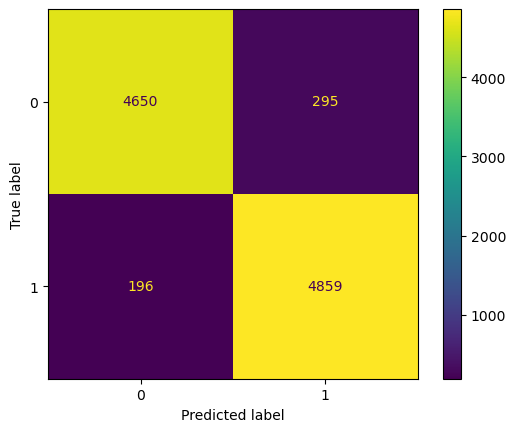

In [21]:
cm = confusion_matrix(re_y_test, base_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [22]:
print(classification_report(re_y_test,base_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4945
           1       0.94      0.96      0.95      5055

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



# toepassen van nieuw getraind model op orginele test data

In [23]:
base_pred = model.predict(X_test)

In [24]:
confusion_matrix(y_test,base_pred)

array([[9528,   44],
       [  16,  412]], dtype=int64)

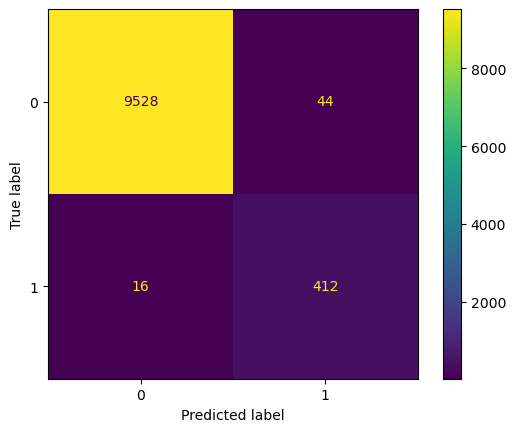

In [25]:
cm = confusion_matrix(y_test, base_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [26]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9572
           1       0.90      0.96      0.93       428

    accuracy                           0.99     10000
   macro avg       0.95      0.98      0.96     10000
weighted avg       0.99      0.99      0.99     10000

